<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Pre-Processing-&amp;-Training-Data-Development" data-toc-modified-id="Pre-Processing-&amp;-Training-Data-Development-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Pre-Processing &amp; Training Data Development<a id="4_Preprocessing_Training_DataDevelopment"></a></a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Introduction<a id="4.1_Introduction"></a></a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Imports<a id="4.2_Imports"></a></a></span></li><li><span><a href="#Loading-the-Data" data-toc-modified-id="Loading-the-Data-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Loading the Data<a id="4.3_Loading_Data"></a></a></span></li><li><span><a href="#Explore-The-Data" data-toc-modified-id="Explore-The-Data-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Explore The Data<a id="4.4_Explore_The_Data"></a></a></span><ul class="toc-item"><li><span><a href="#Feature-Description" data-toc-modified-id="Feature-Description-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Feature Description<a id="4.4.1_Feature_Description"></a></a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-4.4.2"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>Feature Engineering<a id="4.4.2_Feature_Engineering"></a></a></span></li><li><span><a href="#Checking-Correlations" data-toc-modified-id="Checking-Correlations-4.4.3"><span class="toc-item-num">4.4.3&nbsp;&nbsp;</span>Checking Correlations<a id="4.4.3_Checking_Correlations"></a></a></span></li><li><span><a href="#Checking-Data-Skewness" data-toc-modified-id="Checking-Data-Skewness-4.4.4"><span class="toc-item-num">4.4.4&nbsp;&nbsp;</span>Checking Data Skewness<a id="4.4.4_Checking_Data_Skewness"></a></a></span></li><li><span><a href="#Category-to-Numeric-Conversion" data-toc-modified-id="Category-to-Numeric-Conversion-4.4.5"><span class="toc-item-num">4.4.5&nbsp;&nbsp;</span>Category to Numeric Conversion<a id="4.4.4_Category_Numeric_Conversion"></a></a></span></li><li><span><a href="#Pre-Processing-and-Training-Data-Development-Summary" data-toc-modified-id="Pre-Processing-and-Training-Data-Development-Summary-4.4.6"><span class="toc-item-num">4.4.6&nbsp;&nbsp;</span>Pre-Processing and Training Data Development Summary<a id="4.4.6_Preprocessing_Training_Data"></a></a></span></li></ul></li></ul></li></ul></div>

# Pre-Processing & Training Data Development<a id='4_Preprocessing_Training_DataDevelopment'></a>

## Introduction<a id='4.1_Introduction'></a>

For previous phasese of this project, please feel free to access any of the following notebooks:

- 1. <a href="https://github.com/jayguptacal/BankingAndInvestments/blob/main/FinancialFraudDetection/Financial_Frauds_DataWrangling.ipynb" target="_blank">Financial Frauds Problem Identification and Data Wrangling Notebook</a>
- 2. <a href="https://github.com/jayguptacal/BankingAndInvestments/blob/main/FinancialFraudDetection/Financial_Frauds_Exploratory_Data_Analysis.ipynb" target="_blank">EDA Notebook</a>

The focus of this notebook is on the pre-processing and training data development for the machine learning models in the next phase as shown below:

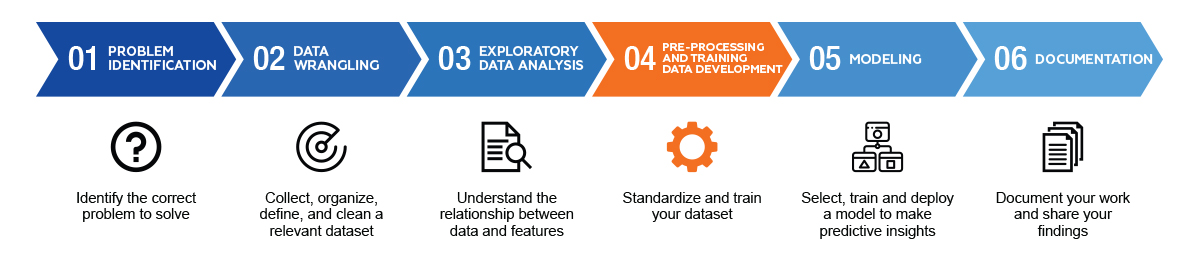

## Imports<a id='4.2_Imports'></a>

In [1]:
# Importing the required packages, libraries and utilities at one place to keep it clean
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
from library.sb_utils import save_file
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from scipy.stats import skew, boxcox

# dataframe display settings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# ignoring warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Loading the Data<a id='4.3_Loading_Data'></a>

In [2]:
# Loading the saved data from the previous step
data = pd.read_csv('../FinancialFraudDetection/data/data_pre.csv')

In [3]:
# Checking the data again to ensure the quality from the previous EDA phase
print(data.shape)
print(data.info())

(6362620, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   index           int64  
 1   step            int64  
 2   type            object 
 3   amount          float64
 4   nameOrig        object 
 5   oldbalanceOrg   float64
 6   newbalanceOrig  float64
 7   nameDest        object 
 8   oldbalanceDest  float64
 9   newbalanceDest  float64
 10  isFraud         int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None


## Explore The Data<a id='4.4_Explore_The_Data'></a>

### Feature Description<a id='4.4.1_Feature_Description'></a>

This is a sample of 1 row with headers explanation:

1,PAYMENT,1060.31,C429214117,1089.0,28.69,M1591654462,0.0,0.0,0,0

**step** - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

**type** - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

**amount** - amount of the transaction in local currency.

**nameOrig** - customer who started the transaction

**oldbalanceOrg** - initial balance before the transaction

**newbalanceOrig** - new balance after the transaction

**nameDest** - customer who is the recipient of the transaction

**oldbalanceDest** - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

**newbalanceDest** - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

**isFraud** - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

### Feature Engineering<a id='4.4.2_Feature_Engineering'></a>

For the feature engineering, I want to give full credit to a Kaggler who came up with <a href="https://www.kaggle.com/sharansalem/fraud-detection-eda-modelling" target="_blank">these ideas</a> for this project.

In [4]:
# The definition of 'step' feature is that it is mapping the time in the real world where 1 step is 1 hour of time.
# This means that a total of 744 steps equal to 31 days.
# Based on this feature, extracting hour from the step feature

data['tx_hour'] = data['step'] % 24
data['tx_hour'] = data['tx_hour'].astype('object')

In [5]:
# Based on the 'nameDest', a transaction can be identified as C2C or C2M (Customer to Merchant)
data['tx_between'] = data['nameDest'].apply(lambda x: 'C2C' if x[0]=='C' else 'C2M')

In [6]:
# Defining the transactions period such as morning, evening and night to see if there is any pattern with the frauds
data['tx_period'] = data['tx_hour'].apply(lambda x: 'night' if x in[11,12,0,1,2,3,4,5] else ('morning' if x in [6,7,8,9,10,11,12,13,14,15,16] else 'evening'))

In [7]:
# Origin Frauds are also possible due to accounting or mathematical errors 
# if transaction amount = (oldbalanceOrg - newbalanceOrig), then there is no error in the transaction
# if transaction amount > (oldbalanceOrg - newbalanceOrig), then there is negative error in the transaction
# if transaction amount < (oldbalanceOrg - newbalanceOrig), then there is positive error in the transaction
data['origin_bal_error'] = data['newbalanceOrig'] + data['amount'] - data['oldbalanceOrg']

In [8]:
# Similar to above, Destination Frauds are also possible due to accounting or mathematical errors 
data['dest_bal_error'] = data['oldbalanceOrg'] + data['amount'] - data['newbalanceOrig']

In [9]:
# Checking data with new features
data.head()

,index,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,tx_hour,tx_between,tx_period,origin_bal_error,dest_bal_error
0,0,1,PAYMENT,9.194276,C1231006815,12.044359,11.984786,M1979787155,0.000000,0.0,0,1,C2M,night,9.134703,9.253849
1,1,1,PAYMENT,7.531166,C1666544295,9.964112,9.872292,M2044282225,0.000000,0.0,0,1,C2M,night,7.439346,7.622987
2,2,1,TRANSFER,5.204007,C1305486145,5.204007,0.000000,C553264065,0.000000,0.0,1,1,C2C,night,0.000000,10.408013
3,3,1,CASH_OUT,5.204007,C840083671,5.204007,0.000000,C38997010,9.960954,0.0,1,1,C2C,night,0.000000,10.408013
4,4,1,PAYMENT,9.364703,C2048537720,10.634773,10.305174,M1230701703,0.000000,0.0,0,1,C2M,night,9.035104,9.694302


In [10]:
# Exploring results based on these new features
data[(data['amount'] > data['oldbalanceOrg']) & (data['newbalanceDest'] > data['oldbalanceDest'])].head()

,index,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,tx_hour,tx_between,tx_period,origin_bal_error,dest_bal_error
10,10,1,DEBIT,9.174292,C1900366749,8.404248,0.0,C997608398,9.291552,11.970243,0,1,C2C,night,0.770044,17.578541
15,15,1,CASH_OUT,12.342066,C905080434,9.637306,0.0,C476402209,8.533854,10.849617,0,1,C2C,night,2.704760,21.979372
24,24,1,TRANSFER,12.649754,C1984094095,9.290629,0.0,C932583850,8.743213,14.815839,0,1,C2C,night,3.359125,21.940384
48,48,1,CASH_OUT,8.584457,C512549200,0.000000,0.0,C248609774,13.388778,15.680123,0,1,C2C,night,8.584457,8.584457
72,72,1,CASH_OUT,11.453752,C1718906711,10.134760,0.0,C977993101,11.510663,13.780786,0,1,C2C,night,1.318992,21.588512


This means there are fradulent transactions where new balanced after the transfers or cash-outs are not reducing the balances accordingly.

### Checking Correlations<a id='4.4.3_Checking_Correlations'></a>

In [11]:
# Checking correlations between various features
data.corr()

,index,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,origin_bal_error,dest_bal_error
index,1.000000,0.965066,0.008245,-0.002181,-0.009564,-0.007905,-0.002358,0.020820,-0.007828,0.012711
step,0.965066,1.000000,0.007377,0.001975,-0.007721,-0.009003,-0.002801,0.031578,-0.011003,0.014789
amount,0.008245,0.007377,1.000000,0.041134,-0.108291,0.612229,0.684925,0.040640,0.211124,0.550272
oldbalanceOrg,-0.002181,0.001975,0.041134,1.000000,0.754680,0.007651,0.026866,0.034560,-0.192780,0.194734
newbalanceOrig,-0.009564,-0.007721,-0.108291,0.754680,1.000000,0.024227,-0.101687,-0.028760,0.437111,-0.452518
oldbalanceDest,-0.007905,-0.009003,0.612229,0.007651,0.024227,1.000000,0.877273,-0.017281,0.287737,0.201512
newbalanceDest,-0.002358,-0.002801,0.684925,0.026866,-0.101687,0.877273,1.000000,-0.007659,0.105302,0.410469
isFraud,0.020820,0.031578,0.040640,0.034560,-0.028760,-0.017281,-0.007659,1.000000,-0.071708,0.090948
origin_bal_error,-0.007828,-0.011003,0.211124,-0.192780,0.437111,0.287737,0.105302,-0.071708,1.000000,-0.699988
dest_bal_error,0.012711,0.014789,0.550272,0.194734,-0.452518,0.201512,0.410469,0.090948,-0.699988,1.000000


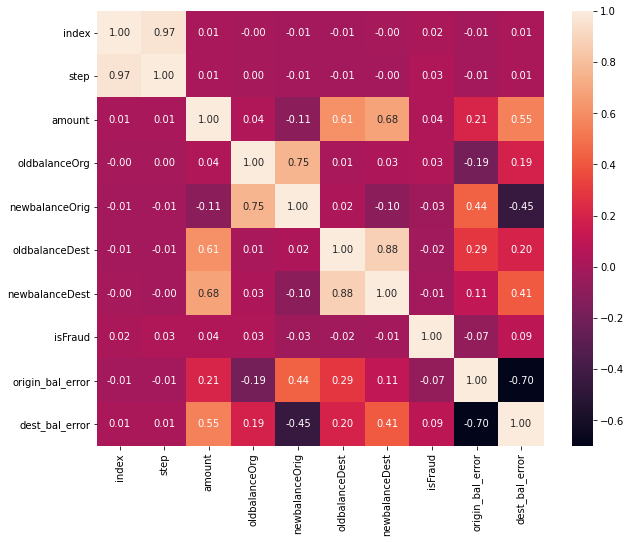

In [12]:
# Exploring correlations visually
f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, fmt='.2f')
plt.show()

As expected, there is a strong correlation among step, amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, and newbalanceDest. Since our focus is to see the strong correlation between isFraud and other features, it does not show that and we need to use the combination of the features identified here.

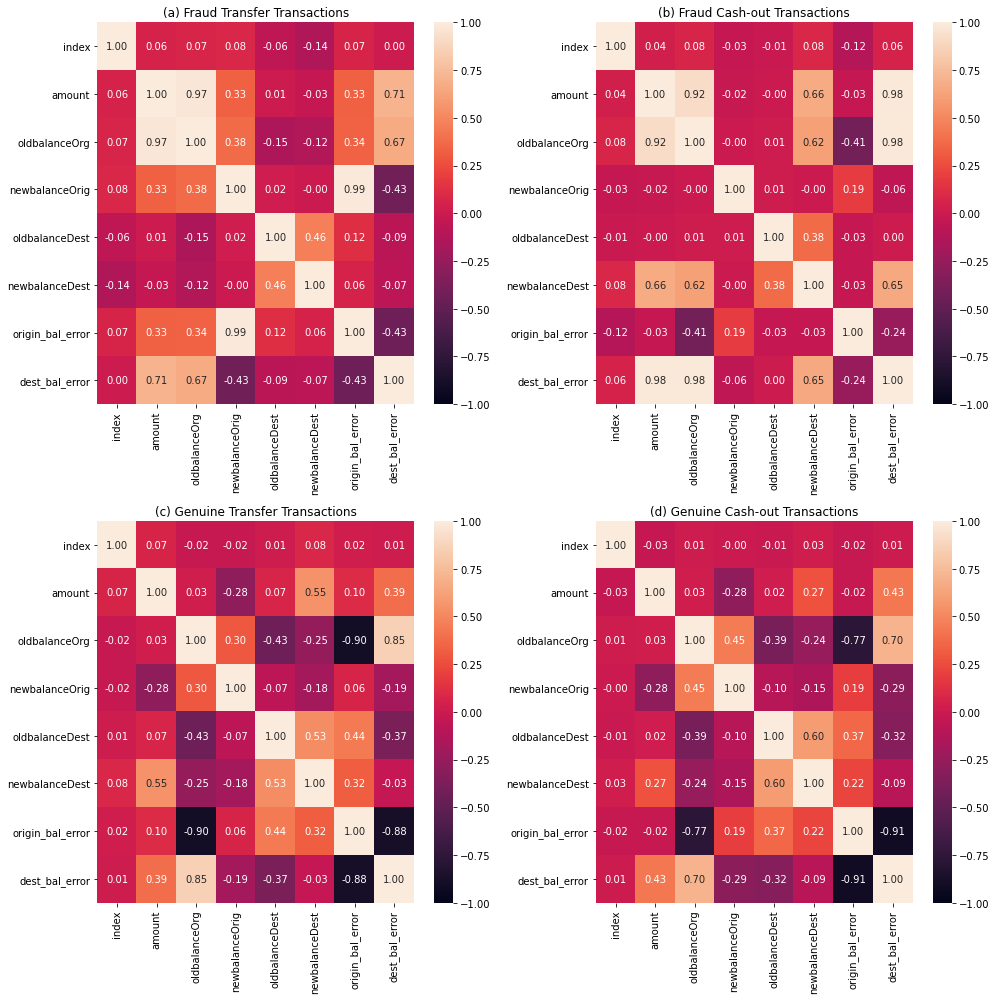

In [13]:
# Making data ready for heatmaps for Fraud vs Genuine transactions for 2 types i.e. Transfer and Cash_out
X = data.loc[(data.type=='TRANSFER') | (data.type=='CASH_OUT')]
X = X.drop(['nameOrig', 'nameDest'], axis=1)
X_Fraud = X.loc[X.isFraud==1]
X_Nonfraud = X.loc[X.isFraud==0]

# Dividing between Cash-out and Transfers
X_Fraud_Cashout = X_Fraud.loc[X_Fraud.type=='CASH_OUT']
X_Fraud_Cashout = X_Fraud_Cashout.drop(['isFraud', 'step'], axis=1)
X_Nonfraud_Cashout = X_Nonfraud.loc[X_Nonfraud.type=='CASH_OUT']
X_Nonfraud_Cashout = X_Nonfraud_Cashout.drop(['isFraud', 'step'], axis=1)
X_Fraud_Transfer = X_Fraud.loc[X_Fraud.type=='TRANSFER']
X_Fraud_Transfer = X_Fraud_Transfer.drop(['isFraud', 'step'], axis=1)
X_Nonfraud_Transfer = X_Nonfraud.loc[X_Nonfraud.type=='TRANSFER']
X_Nonfraud_Transfer = X_Nonfraud_Transfer.drop(['isFraud', 'step'], axis=1)

# Generating heatmaps for these different transactions
fig, axs = plt.subplots(2, 2, figsize=(14,14))
ax1 = sns.heatmap(X_Fraud_Transfer.corr(), vmin = -1, vmax = 1, annot=True, fmt='.2f', ax=axs[0][0])
ax1.set_title("(a) Fraud Transfer Transactions")

ax2 = sns.heatmap(X_Fraud_Cashout.corr(), vmin = -1, vmax = 1, annot=True, fmt='.2f', ax=axs[0][1])
ax2.set_title("(b) Fraud Cash-out Transactions")

ax3 = sns.heatmap(X_Nonfraud_Transfer.corr(), vmin = -1, vmax = 1, annot=True, fmt='.2f', ax=axs[1][0])
ax3.set_title("(c) Genuine Transfer Transactions")

ax4 = sns.heatmap(X_Nonfraud_Cashout.corr(), vmin = -1, vmax = 1, annot=True, fmt='.2f', ax=axs[1][1])
ax4.set_title("(d) Genuine Cash-out Transactions")
plt.tight_layout()
plt.show()

### Checking Data Skewness<a id='4.4.4_Checking_Data_Skewness'></a>

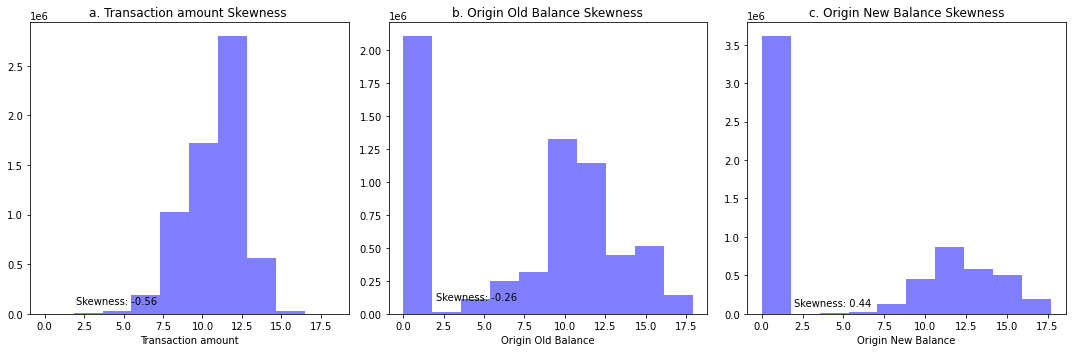

In [14]:
# Checking skewness of the given data as data was already normalized in the EDA phase
# Checking for the transaction amount and origination balances
figure = plt.figure(figsize=(15, 5))
figure.add_subplot(131)
plt.hist(data['amount'] ,facecolor='blue',alpha=0.50) 
plt.xlabel("Transaction amount") 
plt.title("a. Transaction amount Skewness ") 
plt.text(2,100000,"Skewness: {0:.2f}".format(skew(data['amount'])))

figure.add_subplot(132)
plt.hist(data['oldbalanceOrg'] ,facecolor='blue',alpha=0.50) 
plt.xlabel("Origin Old Balance") 
plt.title("b. Origin Old Balance Skewness") 
plt.text(2,100000,"Skewness: {0:.2f}".format(skew(data['oldbalanceOrg'])))

figure.add_subplot(133)
plt.hist(data['newbalanceOrig'] ,facecolor='blue',alpha=0.50) 
plt.xlabel("Origin New Balance") 
plt.title("c. Origin New Balance Skewness") 
plt.text(2,100000,"Skewness: {0:.2f}".format(skew(data['newbalanceOrig'])))

plt.tight_layout()
plt.show()

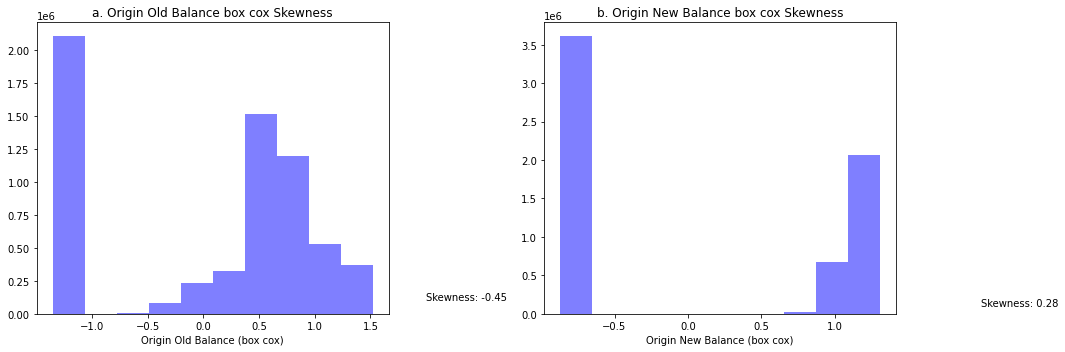

In [15]:
# Checking if box cox transformation will reduce the skewness for the 'oldbalanceOrg' and 'newbalanceOrig'
data['oldbalanceOrg_boxcox'] = preprocessing.scale(boxcox(data['oldbalanceOrg']+1)[0])
data['newbalanceOrig_boxcox'] = preprocessing.scale(boxcox(data['newbalanceOrig']+1)[0])

figure = plt.figure(figsize=(15, 5))
figure.add_subplot(121)
plt.hist(data['oldbalanceOrg_boxcox'] ,facecolor='blue',alpha=0.50) 
plt.xlabel("Origin Old Balance (box cox)") 
plt.title("a. Origin Old Balance box cox Skewness") 
plt.text(2,100000,"Skewness: {0:.2f}".format(skew(data['oldbalanceOrg_boxcox'])))

figure.add_subplot(122)
plt.hist(data['newbalanceOrig_boxcox'] ,facecolor='blue',alpha=0.50) 
plt.xlabel("Origin New Balance (box cox)") 
plt.title("b. Origin New Balance box cox Skewness") 
plt.text(2,100000,"Skewness: {0:.2f}".format(skew(data['newbalanceOrig_boxcox'])))

plt.tight_layout()
plt.show()

It seems that log transformation is good enough to move for the machine learning phase.

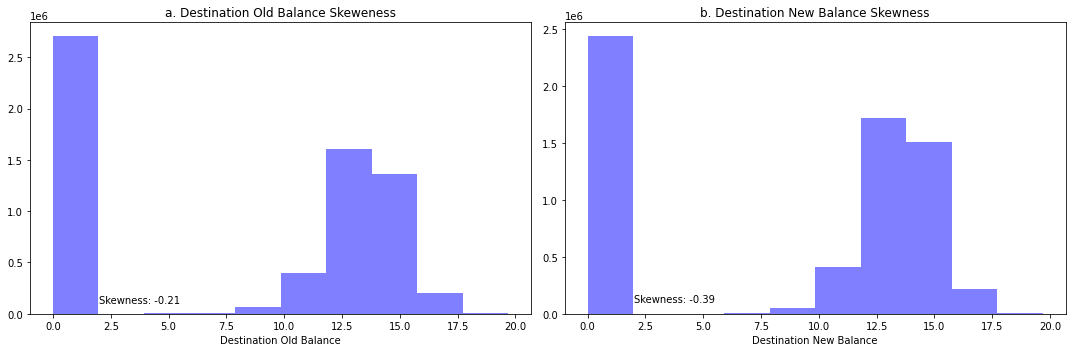

In [16]:
# Checking for the transaction amount and origination balances
figure = plt.figure(figsize=(15, 5))
figure.add_subplot(121)

plt.hist(data['oldbalanceDest'] ,facecolor='blue',alpha=0.50) 
plt.xlabel("Destination Old Balance") 
plt.title("a. Destination Old Balance Skeweness") 
plt.text(2,100000,"Skewness: {0:.2f}".format(skew(data['oldbalanceDest'])))

figure.add_subplot(122)
plt.hist(data['newbalanceDest'] ,facecolor='blue',alpha=0.50) 
plt.xlabel("Destination New Balance") 
plt.title("b. Destination New Balance Skewness") 
plt.text(2,100000,"Skewness: {0:.2f}".format(skew(data['newbalanceDest'])))

plt.tight_layout()
plt.show()

As the log transformation was done in the EDA phase, the data is much better now in terms of skewness and ready for the machine learning phase.

### Category to Numeric Conversion<a id='4.4.4_Category_Numeric_Conversion'></a>

In [17]:
# Transforming categorical features to numeric
le = LabelEncoder()
data.type = le.fit_transform(data.type)

In [18]:
# Checking data again as we are now ready for the next machine learning phase
data.head()

,index,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,tx_hour,tx_between,tx_period,origin_bal_error,dest_bal_error,oldbalanceOrg_boxcox,newbalanceOrig_boxcox
0,0,1,3,9.194276,C1231006815,12.044359,11.984786,M1979787155,0.000000,0.0,0,1,C2M,night,9.134703,9.253849,0.813274,1.137770
1,1,1,3,7.531166,C1666544295,9.964112,9.872292,M2044282225,0.000000,0.0,0,1,C2M,night,7.439346,7.622987,0.534587,1.046624
2,2,1,4,5.204007,C1305486145,5.204007,0.000000,C553264065,0.000000,0.0,1,1,C2C,night,0.000000,10.408013,-0.193633,-0.871735
3,3,1,1,5.204007,C840083671,5.204007,0.000000,C38997010,9.960954,0.0,1,1,C2C,night,0.000000,10.408013,-0.193633,-0.871735
4,4,1,3,9.364703,C2048537720,10.634773,10.305174,M1230701703,0.000000,0.0,0,1,C2M,night,9.035104,9.694302,0.626456,1.067127


In [19]:
# Dropping the last 2 box cox columns added as it is not required.
data.drop(['oldbalanceOrg_boxcox', 'newbalanceOrig_boxcox'], axis=1, inplace=True)
data_ml = data.reset_index()

In [20]:
data_ml.head()

,level_0,index,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,tx_hour,tx_between,tx_period,origin_bal_error,dest_bal_error
0,0,0,1,3,9.194276,C1231006815,12.044359,11.984786,M1979787155,0.000000,0.0,0,1,C2M,night,9.134703,9.253849
1,1,1,1,3,7.531166,C1666544295,9.964112,9.872292,M2044282225,0.000000,0.0,0,1,C2M,night,7.439346,7.622987
2,2,2,1,4,5.204007,C1305486145,5.204007,0.000000,C553264065,0.000000,0.0,1,1,C2C,night,0.000000,10.408013
3,3,3,1,1,5.204007,C840083671,5.204007,0.000000,C38997010,9.960954,0.0,1,1,C2C,night,0.000000,10.408013
4,4,4,1,3,9.364703,C2048537720,10.634773,10.305174,M1230701703,0.000000,0.0,0,1,C2M,night,9.035104,9.694302


In [21]:
# Saving the Preprocessing phase data into a new datafile for further use in the Machine Learning notebook
datapath = '../FinancialFraudDetection/data'
save_file(data_ml, 'data_ml.csv', datapath)

Writing file.  "../FinancialFraudDetection/data\data_ml.csv"


### Pre-Processing and Training Data Development Summary<a id='4.4.6_Preprocessing_Training_Data'></a>

During this phase, the following was achieved:

- New features were created using the feature engineering techniques.
- Correlations were identified.
- Data skewness was checked and log transformation done during EDA was cross-checked with box cox transformation.
- Category types were converted to numeric using the Label Encoding method.
- Data was saved for the machine learning phase notebook.

For the next phase, please click here for the <a href="https://github.com/jayguptacal/BankingAndInvestments/blob/main/FinancialFraudDetection/Financial_Frauds_Machine_Learning.ipynb" target="_blank">machine learning notebook</a>.